In [1]:
import re
import pandas as pd
from datetime import datetime

In [2]:
main_attr = "burna"

In [3]:
# Load data
df = pd.read_csv(f"data/{main_attr}.csv")


In [4]:
df.columns


Index(['id', 'timestamp_utc', 'local_time', 'user_screen_name', 'text',
       'possibly_sensitive', 'retweet_count', 'like_count', 'reply_count',
       'lang', 'to_username', 'to_userid', 'to_tweetid', 'source_name',
       'source_url', 'user_location', 'lat', 'lng', 'user_id', 'user_name',
       'user_verified', 'user_description', 'user_url', 'user_image',
       'user_tweets', 'user_followers', 'user_friends', 'user_likes',
       'user_lists', 'user_created_at', 'user_timestamp_utc', 'collected_via',
       'match_query', 'retweeted_id', 'retweeted_user', 'retweeted_user_id',
       'retweeted_timestamp_utc', 'quoted_id', 'quoted_user', 'quoted_user_id',
       'quoted_timestamp_utc', 'collection_time', 'url', 'place_country_code',
       'place_name', 'place_type', 'place_coordinates', 'links', 'domains',
       'media_urls', 'media_files', 'media_types', 'mentioned_names',
       'mentioned_ids', 'hashtags'],
      dtype='object')

In [5]:
# Filter
df.text = df.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
df.text = df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
df.text = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
timestamps = df.local_time.to_list()
tweets = df.text.to_list()

In [6]:
tweets[0]

'rt he says the album is like my birthday gift to me it s really special'

In [7]:
from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=35, verbose=True)
topics, _ = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/387 [00:00<?, ?it/s]

2022-11-19 09:01:34,407 - BERTopic - Transformed documents to Embeddings
2022-11-19 09:02:24,459 - BERTopic - Reduced dimensionality
2022-11-19 09:02:25,193 - BERTopic - Clustered reduced embeddings


In [8]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,1315,-1_burna_boy_damini_love
1,0,887,0_peak_charting_becomes_itunes
2,1,678,1_drillmatic_hit_midnight_game
3,2,596,2_here_burnaboy_new_is
4,3,518,3_friday_dropping_on_his
5,4,430,4_song_performs_capacity_unreleased
6,5,402,5_download_lovedamini_album_mytrendcaster
7,6,398,6_by_shayoooooooo_double_trouble
8,7,358,7_uk_starr_touching_spotted
9,8,348,8_lmb_madness_features_popcaan


In [9]:
topic_model.get_topic(4)

[('song', 0.0951977284699399),
 ('performs', 0.0761081407207215),
 ('capacity', 0.07594857897498498),
 ('unreleased', 0.0758730586866835),
 ('wembley', 0.07554945779515555),
 ('london', 0.07553120608103794),
 ('england', 0.07532492646986662),
 ('stadium', 0.07517925475385803),
 ('titled', 0.07130466980896057),
 ('upcoming', 0.061367675388616295)]

In [10]:
# import plotly.io as pio
# pio.renderers.default = 'svg'

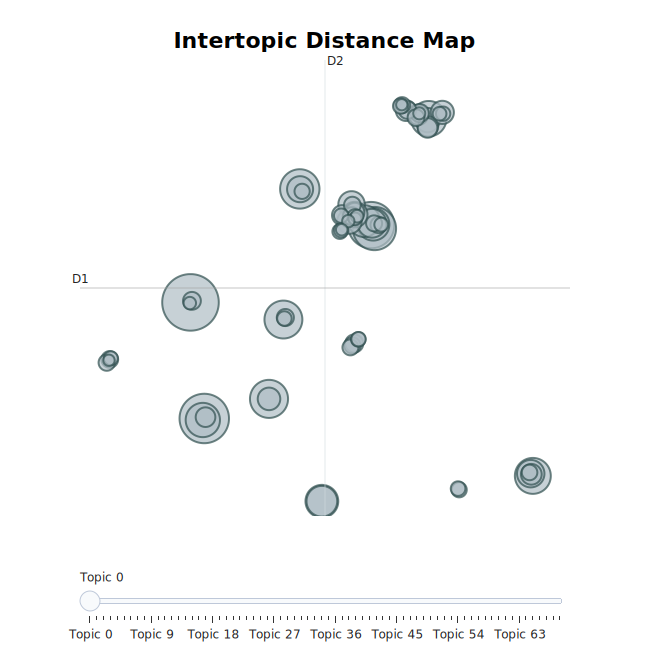

In [11]:
fig = topic_model.visualize_topics(); fig

In [12]:
topics_over_time = topic_model.topics_over_time(docs=tweets, 
                                                timestamps=timestamps, 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=20)

6it [00:00, 16.37it/s]


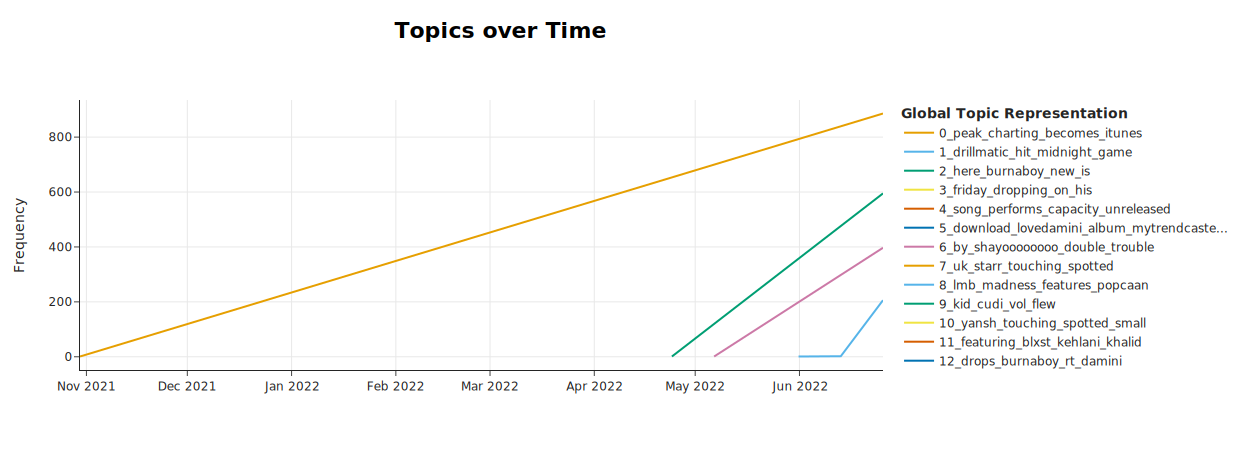

In [13]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)